In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('Sales Transaction v.4a.csv')
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [17]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [18]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [19]:
df['CustomerNo'] = df.CustomerNo.fillna(0)


In [20]:
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [21]:
df['ProductNo'] = pd.to_numeric(df['ProductNo'], errors='coerce')

In [22]:
df.CustomerNo.value_counts()

CustomerNo
17841.0    7967
14911.0    5800
14096.0    5093
12748.0    4627
14606.0    2773
           ... 
17948.0       1
12081.0       1
13775.0       1
13017.0       1
17558.0       1
Name: count, Length: 4739, dtype: int64

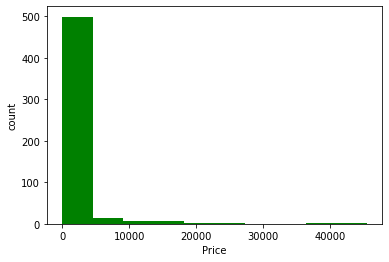

In [23]:
df.Price.value_counts().plot(kind= 'hist', color= 'green')
plt.xlabel('Price')
plt.ylabel('count')
plt.show()

In [24]:
X = df[['Price', 'Quantity', 'CustomerNo']]
y = df['ProductName']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


Refernce: 
Gabriel Ramos. May-2022. E-commerce Business Transaction, version 4a. Retrieved 09/05/2023 from https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business-